In [1]:
# Libraries
!pip install pyspan
!pip install keras
!pip install scikit-learn
from google.colab import drive
import pandas as pd
import pyspan as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Input

In [2]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/Internship/Task - 6/creditcard.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##**Preprocessing Data**

In [4]:
data.isnull().sum()
# renaming some column
data.rename(columns={'Time (seconds}':'Time (seconds)','Amount':'Amount $'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      284807 non-null  float64
 1   V1        284807 non-null  float64
 2   V2        284807 non-null  float64
 3   V3        284807 non-null  float64
 4   V4        284807 non-null  float64
 5   V5        284807 non-null  float64
 6   V6        284807 non-null  float64
 7   V7        284807 non-null  float64
 8   V8        284807 non-null  float64
 9   V9        284807 non-null  float64
 10  V10       284807 non-null  float64
 11  V11       284807 non-null  float64
 12  V12       284807 non-null  float64
 13  V13       284807 non-null  float64
 14  V14       284807 non-null  float64
 15  V15       284807 non-null  float64
 16  V16       284807 non-null  float64
 17  V17       284807 non-null  float64
 18  V18       284807 non-null  float64
 19  V19       284807 non-null  float64
 20  V20 

In [5]:
# detecting outliers
ps.detect_outliers(df=data,columns=['Amount $'],threshold=1.5)

Total number of outliers detected in column 'Amount $': 31904
Original data shape: (284807, 31)
Data shape after removing outliers: (252903, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount $,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


Removed some outliers in Amount using IQR with 1.5 threshold

In [6]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      284807 non-null  float64
 1   V1        284807 non-null  float64
 2   V2        284807 non-null  float64
 3   V3        284807 non-null  float64
 4   V4        284807 non-null  float64
 5   V5        284807 non-null  float64
 6   V6        284807 non-null  float64
 7   V7        284807 non-null  float64
 8   V8        284807 non-null  float64
 9   V9        284807 non-null  float64
 10  V10       284807 non-null  float64
 11  V11       284807 non-null  float64
 12  V12       284807 non-null  float64
 13  V13       284807 non-null  float64
 14  V14       284807 non-null  float64
 15  V15       284807 non-null  float64
 16  V16       284807 non-null  float64
 17  V17       284807 non-null  float64
 18  V18       284807 non-null  float64
 19  V19       284807 non-null  float64
 20  V20 

(284807, 31)

In [7]:
# Splitting data for train_test
X = data.iloc[:,0:29].values
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##Logistic Regression Model

In [8]:
# linear Regression model
linear_model = LogisticRegression()
linear_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred_linear = linear_model.predict(X_test)

In [10]:
# Evaluating model
mae = mean_absolute_error(y_test,y_pred_linear)
print(mae)

0.001088444928197746


Model is performing quit good

In [11]:
results_comparision_logistic = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_linear})
results_comparision_logistic.head(10)

,Actual,Predicted
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
101565,0,0
260880,0,0
214337,0,0
201575,0,0
81055,0,0


In [12]:
acc_score =  accuracy_score(y_test,y_pred_linear)
print(acc_score)

0.9989115550718023


## **Decision Tree Classifier**

In [13]:
treeCls = DecisionTreeClassifier()
treeCls.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred_tree = treeCls.predict(X_test)

In [15]:
mea = mean_absolute_error(y_test,y_pred_tree)
print(mea)

0.0008426670411853516


In [16]:
results_comparision_tree = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_tree})
results_comparision_tree.head(10)

,Actual,Predicted
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
101565,0,0
260880,0,0
214337,0,0
201575,0,0
81055,0,0


In [17]:
acc_score =  accuracy_score(y_test,y_pred_tree)
print(acc_score)

0.9991573329588147


##**Netural Network**

In [18]:
neural_model = Sequential()
neural_model.add(Input(shape=(29,))) #Assuming input features
neural_model.add(Dense(10,activation='relu')) #Hidden Layer
neural_model.add(Dense(1,activation='sigmoid')) #Output Layer

neural_model.compile(optimizer='adam',loss= 'mean_squared_error')

neural_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
neural_model.fit(X_train,y_train)

6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5213


In [20]:
y_pred_neural = neural_model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [21]:
mea = mean_absolute_error(y_test,y_pred_neural)
print(mea)

0.0016049685655161738


In [22]:
# Convert to (n,) shape if predictions are in (n, 1)
if y_pred_neural.shape[-1] == 1:
    y_pred_neural = np.squeeze(y_pred_neural)

In [23]:
print(y_pred_neural.shape)

(85443,)


In [24]:
results_comparision_neural = pd.DataFrame({"Actual": y_test,"Predictied": y_pred_neural})
results_comparision_neural.tail(20)

,Actual,Predictied
274627,0,0.0
147008,0,0.0
231478,0,0.0
275117,0,0.0
32463,0,0.0
94293,0,0.0
107027,0,0.0
70725,0,0.0
86396,0,0.0
67499,0,0.0


##**Plotting**

In [25]:
Models_Comparision = pd.DataFrame({'Actual': y_test,'Logistic Regression': y_pred_linear,'Decision Tree Classifier': y_pred_tree,'Nueral Network': y_pred_neural})
Models_Comparision.head(20)

,Actual,Logistic Regression,Decision Tree Classifier,Nueral Network
43428,1,1,1,0.0
49906,0,0,0,0.0
29474,0,0,0,0.0
276481,0,0,0,0.0
278846,0,0,0,0.0
101565,0,0,0,0.0
260880,0,0,0,0.0
214337,0,0,0,0.0
201575,0,0,0,0.0
81055,0,0,0,0.0


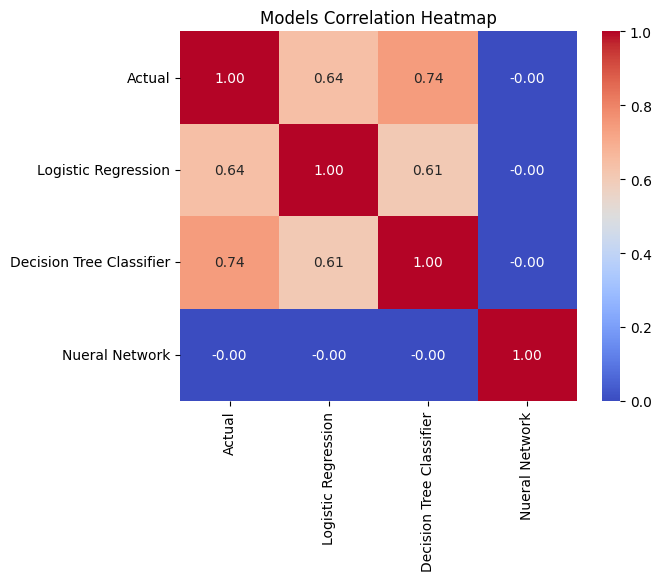

In [28]:
correletion = Models_Comparision.corr()
sns.heatmap(correletion,annot= True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Models Correlation Heatmap")
plt.show()